# Dolphin Social Network
### Peter Hansen & Chelpang Alhassan
The Dataset

This data is from a small, closed population of bottlenose dolphins in the Doubtful Sound. 

In [106]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [107]:
dolphin_graph = nx.read_gml('dolphins/dolphins.gml')

In [108]:
print('Nodes: ' + str(dolphin_graph.number_of_nodes()))
print('\tEach node represents a dolphin in the Doubtful Sound.')
print('Edges: ' + str(dolphin_graph.number_of_edges()))
print('\tEach edge represents a frequent association between two dolphins.')
print('Directed: ' + str(nx.is_directed(dolphin_graph)))
print('Weighted: ' + str(nx.is_weighted(dolphin_graph)))
print('Connected: ' + str(nx.is_connected(dolphin_graph)))

Nodes: 62
	Each node represents a dolphin in the Doubtful Sound.
Edges: 159
	Each edge represents a frequent association between two dolphins.
Directed: False
Weighted: False
Connected: True


### Interesting Facts & Metadata
The individual dolphins live in large, mixed-sex groups with no permanent emigration/immigration and for this study they were observed for 7 years.

In this group, both male-male and female-female relationships are present, as are long-lasting relationships across sexes.

This group has unprecedented high degrees of stability in comparison to other populations of bottlenose dolphins. 

For metadata, we were only given names for the dolphins. However, the paper contained the genders and more exact measurements for time that dolphins spent together.


# Adjacency Matrix

In [110]:
print(nx.adjacency_matrix(dolphin_graph).toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]



### Network Plot


In [71]:
dolphin_graph = nx.read_gml('dolphins/dolphins.gml')

In [72]:
pos = nx.spring_layout(dolphin_graph, k=1)

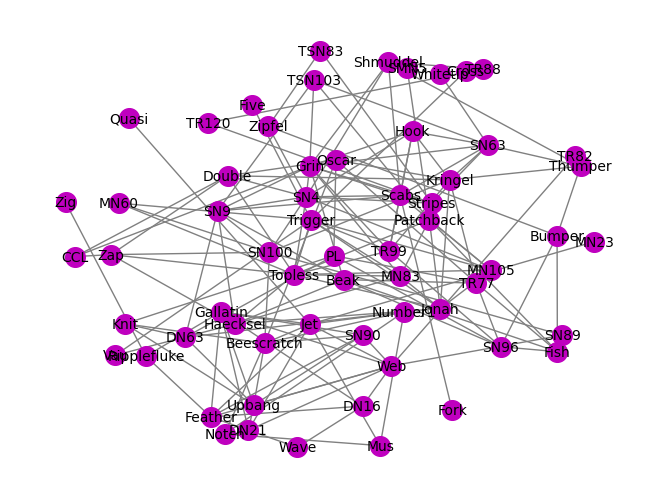

In [73]:
nx.draw(dolphin_graph, pos=pos, node_size=200, edge_color='grey', font_size=10 , node_color='m', with_labels=True)

# Centrality Metrics

In [92]:
degree_c = nx.degree_centrality(dolphin_graph)
closeness_c = nx.closeness_centrality(dolphin_graph)
eigenv_c = nx.eigenvector_centrality(dolphin_graph)
betweenness_c = nx.betweenness_centrality(dolphin_graph)

print('The person with highest degree centrality is', max(degree_c, key=lambda key: degree_c[key]))
print('The person with highest closeness centrality is', max(closeness_c, key=lambda key: closeness_c[key]))
print('The person with highest eigenvector centrality is', max(eigenv_c, key=lambda key: eigenv_c[key]))
print('The person with highest betweenness centrality is', max(betweenness_c, key=lambda key: betweenness_c[key]))

The person with highest degree centrality is Grin
The person with highest closeness centrality is SN100
The person with highest eigenvector centrality is Grin
The person with highest betweenness centrality is SN100


# Degree Centrality

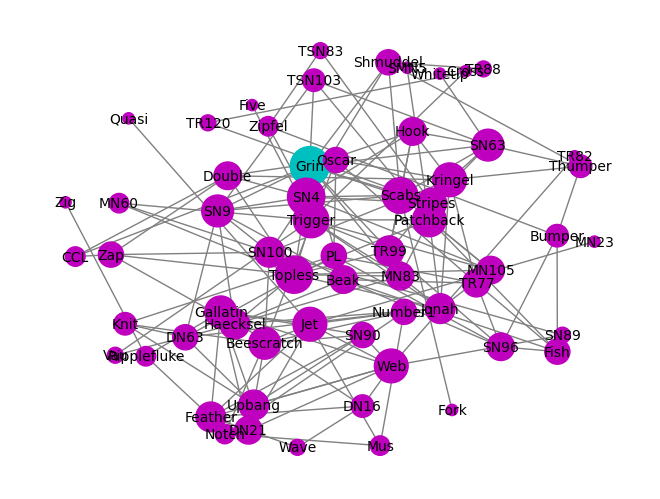

In [93]:
degree_c1 = []
for name in degree_c:
    degree_c1.append(degree_c[name] * 4000)
degree_c2 = []
for name in degree_c:
    if name == 'Grin':
        degree_c2.append('c')
    else:
        degree_c2.append('m')
nx.draw(dolphin_graph, pos=pos, node_size=degree_c1, edge_color='grey', font_size = 10, with_labels=True, node_color=degree_c2)

# Closeness Centrality

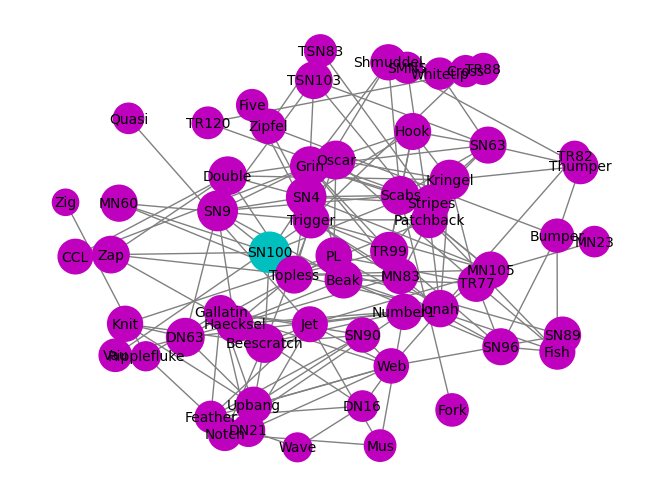

In [94]:
closeness_c1 = []
for name in closeness_c:
    closeness_c1.append(closeness_c[name] * 2000)
closeness_c2 = []
for name in closeness_c:
    if name == 'SN100':
        closeness_c2.append('c')
    else:
        closeness_c2.append('m')
nx.draw(dolphin_graph, pos=pos, node_size=closeness_c1, edge_color='grey', font_size = 10, with_labels=True, node_color=closeness_c2)

# Betweeness Centrality

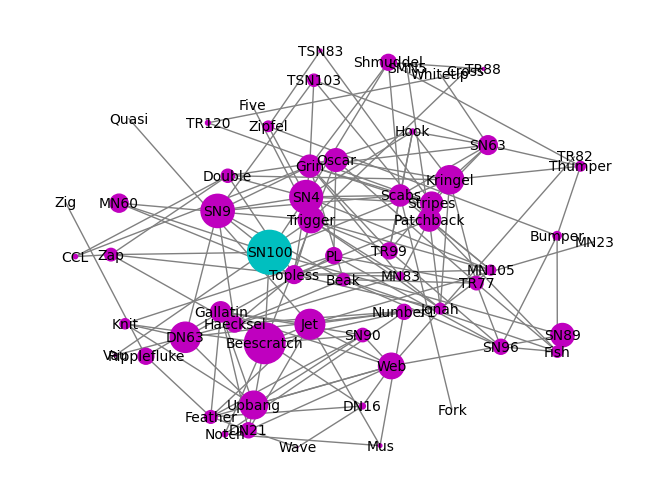

In [95]:
betweenness_c1 = []
for name in betweenness_c:
    betweenness_c1.append(betweenness_c[name] * 4000)
betweenness_c2 = []
for name in betweenness_c:
    if name == 'SN100':
        betweenness_c2.append('c')
    else:
        betweenness_c2.append('m')
nx.draw(dolphin_graph, pos=pos, node_size=betweenness_c1, edge_color='grey', font_size = 10, with_labels=True, node_color=betweenness_c2)

# Eigenvector Centrality

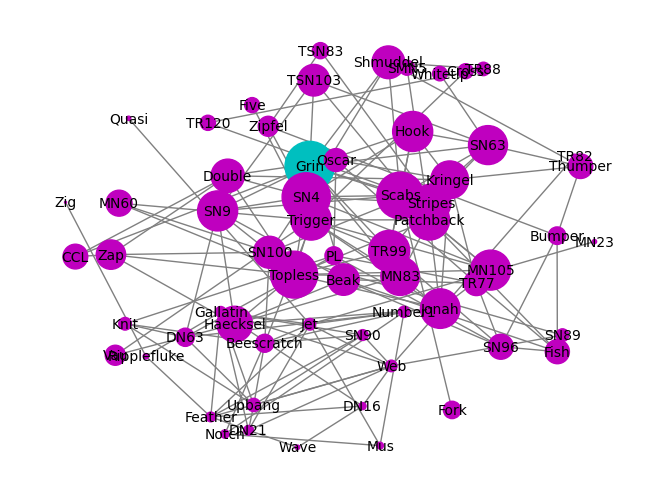

In [98]:
eigenv_c1 = []
for name in eigenv_c:
    eigenv_c1.append(eigenv_c[name] * 4000)
eigenv_c2 = []
for name in eigenv_c:
    if name == 'Grin':
        eigenv_c2.append('c')
    else:
        eigenv_c2.append('m')
nx.draw(dolphin_graph, pos=pos, node_size=eigenv_c1, edge_color='grey', font_size = 10, with_labels=True, node_color=eigenv_c2)

# Most Informative Centrality Metric

The most informative centrality metric is Eigenvector Centrality.
This is because using Eigenvector Centrality measures a node’s importance while giving consideration to the importance of its neighbours.
A dolphin with few connections can have the highest Eigenvector centrality measure if all of its connections have high scores. 
This can help identify the most influential dolphins in the group. 



# Plot of the different communities

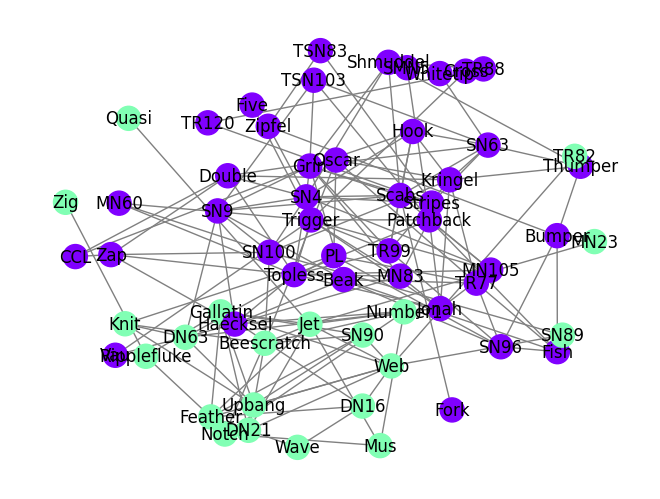

In [99]:
from networkx.algorithms.community import girvan_newman
import matplotlib.cm as cmx
import matplotlib.pyplot as plt

comm = girvan_newman(dolphin_graph)
gn_communities = tuple(sorted(c) for c in next(comm))

names_and_nums = dict()
i = 0
for name in degree_c:
    names_and_nums[name] = i
    i += 1

def Plot_Comm(Network, C, names_and_nums, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ names_and_nums[C[i][j]] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    nx.draw(Network, pos, node_color=color_map, node_size=300, edge_color='grey', with_labels=True)
    plt.show()
    return
Plot_Comm(dolphin_graph, gn_communities, names_and_nums, pos)

We believe that the different communities present represent a gender split in the group. The research report makes reference to the fact that there are three mixed-sex groups present in the Doubtful Sound. When the names of the dolphins, differenciated by sex, is compared to the differnt communities we can see some evidence of the communities being split by gender. This split if not xact though, as there are a few members of the other sex in the group. 

# Average Social Network

In [79]:
print(nx.average_shortest_path_length(dolphin_graph))

3.3569539925965097


The average shortest path is 3.357.
Meaning that the dolphins are all closely related to one another by having on average only 3.357 friendships between themselves and any other dolphin.
Relating back to the small world theory, this means that the dolphins even if they are not friends, are still linked by a very short chain of acquaintances.


# Conclusion

It is interesting how similar dolphin social networks are to human social networks. For example, just like humans some dolphins have more popularity and influence than others and some dolphins are just more social than others.
Before this project, we were previously unaware that dolphins lived in such large groups for such long periods of time. Especially without any immigration / emigration.
Something we wish we could know is if there were any relationships that ended over the course of the 7 years and why they ended. 
As for additional data, we believe if the graph was weighted, it would be easier to understand the dynamics between the dolphins.